In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 15)

## 问题
* 哪些电影最受人关注？
* 哪些电影评分最高？
* 电影的评分和年龄、性别有关吗？

## load data

本案例参考参考Gred Reda的分析<br/>
http://grouplens.org/datasets/movielens/

**评分表**<br/>
196 242 3 881250949<br/>
186 302 3 891717742<br/>
22 377 1 878887116<br/>
244 51 2 880606923<br/>
166 346 1 886397596<br/>
298 474 4 884182806<br/>
115 265 2 881171488<br/>
253 465 5 891628467<br/>
305 451 3 886324817<br/>
**用户信息表**<br/>
1|24|M|technician|85711<br/>
2|53|F|other|94043<br/>
3|23|M|writer|32067<br/>
4|24|M|technician|43537<br/>
5|33|F|other|15213<br/>
**电影表**<br/>
1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0<br/>
2|GoldenEye (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?GoldenEye%20(1995)|0|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0<br/>
3|Four Rooms (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|0|1|0|0<br/>
4|Get Shorty (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Get%20Shorty%20(1995)|0|1|0|0|0|1|0|0|1|0|0|0|0|0|0|0|0|0|0<br/>
5|Copycat (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Copycat%20(1995)|0|0|0|0|0|0|1|0|1|0|0|0|0|0|0|0|1|0|0<br/>

> **下面的代码在使用的过程中，我发现如果我们要是给一个数据表的列赋名称，如果我们赋的名称的数量要是小于数据列的数量的话，实际上赋值是失败的！！**

In [11]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./data/ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

# 下面这个表的列实际上是比较多的，我们只要使用他的前5列就行。
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('./data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

# merge
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

In [12]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [13]:
lens.shape

(100000, 12)

In [14]:
lens[['age', 'rating']].describe()

,age,rating
count,100000.000000,100000.000000
mean,32.969850,3.529860
std,11.562623,1.125674
min,7.000000,1.000000
25%,24.000000,3.000000
50%,30.000000,4.000000
75%,40.000000,4.000000
max,73.000000,5.000000


In [15]:
lens['sex'].value_counts()

M    74260
F    25740
Name: sex, dtype: int64

In [16]:
total_null = lens.isnull().sum()
print(total_null)

movie_id                   0
title                      0
release_date               9
video_release_date    100000
imdb_url                  13
user_id                    0
rating                     0
unix_timestamp             0
age                        0
sex                        0
occupation                 0
zip_code                   0
dtype: int64


## 评分最多的电影

> * **`size`** 这个函数是用来统计每组里面的个数。
> * 对于DateFrame的单个列的内容，我们可以通过 **`value_counts`** 对值进行统计，而对于DateFrame的话，我们是使用 **`size`** 方法来对整行内容的数量进行统计。

In [24]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:20]
most_rated

title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
                                   ... 
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Length: 20, dtype: int64

In [25]:
# 上面的方式，实际上和下面使用的value_counts的方式得到的结果相同，而且自动帮我们按倒序排序了。
lens.title.value_counts()[:20]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
                                   ... 
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, Length: 20, dtype: int64

## 评分最高的电影

In [26]:
movie_stats = lens.groupby('title').agg({'rating':[np.size, np.mean]})
movie_stats.head(10)

rating          
                                              size      mean
title                                                       
'Til There Was You (1997)                        9  2.333333
1-900 (1994)                                     5  2.600000
101 Dalmatians (1996)                          109  2.908257
12 Angry Men (1957)                            125  4.344000
187 (1997)                                      41  3.024390
2 Days in the Valley (1996)                     93  3.225806
20,000 Leagues Under the Sea (1954)             72  3.500000
2001: A Space Odyssey (1968)                   259  3.969112
3 Ninjas: High Noon At Mega Mountain (1998)      5  1.000000
39 Steps, The (1935)                            59  4.050847

> 在下面的这个例子中，我们可以看到在排序的时候，使用了 **层级** 的内容进行排序。所以在列表中又使用元组。

In [29]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head(10)

rating     
                                                    size mean
title                                                        
They Made Me a Criminal (1939)                         1  5.0
Marlene Dietrich: Shadow and Light (1996)              1  5.0
Saint of Fort Washington, The (1993)                   2  5.0
Someone Else's America (1995)                          1  5.0
Star Kid (1997)                                        3  5.0
Great Day in Harlem, A (1994)                          1  5.0
Aiqing wansui (1994)                                   1  5.0
Santa with Muscles (1996)                              2  5.0
Prefontaine (1997)                                     3  5.0
Entertaining Angels: The Dorothy Day Story (1996)      1  5.0

只有1人评分的似乎不应该考虑

In [31]:
# 列是二维索引
atleast_100 = movie_stats['rating']['size'] > 100    # 这个是后的是boolean的DataFrame
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

## 分析评分人数最多的百部电影

In [34]:
most_100 = lens.groupby('movie_id').size().sort_values(ascending=False)[:100]
most_100

movie_id
50     583
258    509
100    508
181    507
294    485
286    481
288    478
      ... 
161    220
71     220
8      219
95     219
427    219
678    219
322    218
Length: 100, dtype: int64

## 评分与年龄有关吗？

Text(0.5,0,'age')

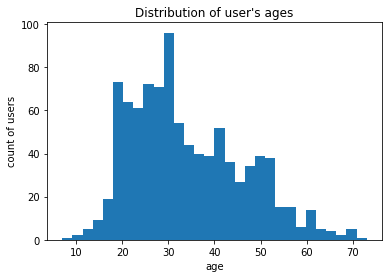

In [35]:
users.age.plot.hist(bins=30)
plt.title("Distribution of user's ages")
plt.ylabel('count of users')
plt.xlabel('age')

In [36]:
import seaborn as sns

### 下面使用 **`seaborn`** 的 **`distplot`** 方法的时候
> * 默认 **`kde`** 是True， 可以看到曲线图；
> * 对于参数 **`rug`** ，如果设置为True的话，会画出数据的分布点。

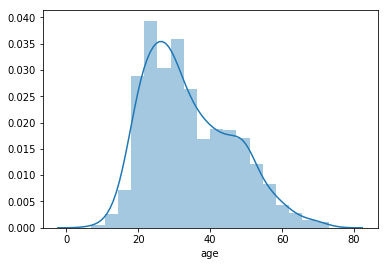

In [37]:
sns.distplot(users.age)

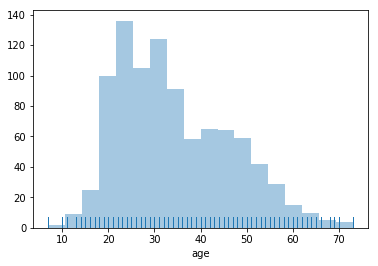

In [38]:
sns.distplot(users.age, kde=False, rug=True)

In [39]:
users.age.min(), users.age.max()

(7, 73)

> 下面演示了一种分组的方式，通过 **`pd.cut`** 的方式进行分组。

In [41]:
np.arange(0, 81, 10)    # np.arange()的参数，第一个是开始的值，第二个是结束的位置，第三个是间隔。

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

> 在我们使用 **`pd.cut`** 方法来对数据进行分组的时候，参数 **`right`** 表示是否包含分组范围的右边。

In [40]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
# 下面创建一个新的列
lens['age_group'] = pd.cut(lens.age, np.arange(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


In [42]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [44]:
lens.groupby('age_group').agg({'rating':[np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

### 现在的index是缺省的，不利于我们之后的分析，我们需要现在进行替换。

In [46]:
lens.set_index('movie_id', inplace=True)

KeyError: 'movie_id'

In [47]:
lens

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69
9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,60,M,retired,95076,60-69
11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,60,M,retired,95076,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...
689,"Jackal, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Jackal%2C+The...,729,4,893286638,19,M,student,56567,10-19


In [49]:
lens.loc[most_100.index]      # 先找到评分最多的电影的数据。

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,308,5,887737431,60,M,retired,95076,60-69
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,287,5,875334271,21,M,salesman,31211,20-29
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,148,5,877016805,33,M,engineer,97006,30-39
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,280,3,891701027,30,F,librarian,22903,30-39
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,66,5,883601236,23,M,student,80521,20-29
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,5,4,875635758,33,F,other,15213,30-39
50,Star Wars (1977),01-Jan-1977,NaN,http://us.imdb.com/M/title-exact?Star%20Wars%2...,109,5,880563331,29,M,other,55423,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...
322,Murder at 1600 (1997),18-Apr-1997,NaN,http://us.imdb.com/M/title-exact?Murder%20at%2...,856,4,891489593,43,F,marketing,97215,40-49


In [48]:
by_age = lens.loc[most_100.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                         age_group
2001: A Space Odyssey (1968)  0-9          5.000000
                              10-19        4.100000
                              20-29        3.924731
                              30-39        3.887500
                              40-49        4.093023
                              50-59        4.000000
                              60-69        4.285714
Air Force One (1997)          10-19        3.647059
                              20-29        3.666667
                              30-39        3.570000
                              40-49        3.555556
                              50-59        3.750000
                              60-69        3.666667
                              70-79        3.666667
Aladdin (1992)                10-19        3.840000
Name: rating, dtype: float64

In [51]:
by_age.rating.mean().unstack(1).fillna(0)[:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,0.000000
Air Force One (1997),0.0,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
Aladdin (1992),0.0,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,0.000000
Alien (1979),0.0,4.111111,4.026087,4.103448,3.833333,4.272727,3.500000,4.000000
Aliens (1986),0.0,4.050000,4.087719,3.887640,3.526316,4.235294,3.800000,3.000000
Amadeus (1984),0.0,4.250000,4.067308,4.236842,4.081633,4.230769,4.750000,5.000000
Apocalypse Now (1979),0.0,4.400000,4.050633,4.132353,3.700000,4.187500,4.142857,5.000000
...,...,...,...,...,...,...,...,...
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.000000


> 在使用 **`heatmap`** 的时候，参数 **`annot`** 是表示颜色标注， 而参数 **`fmt`** 是数据格式的设定。

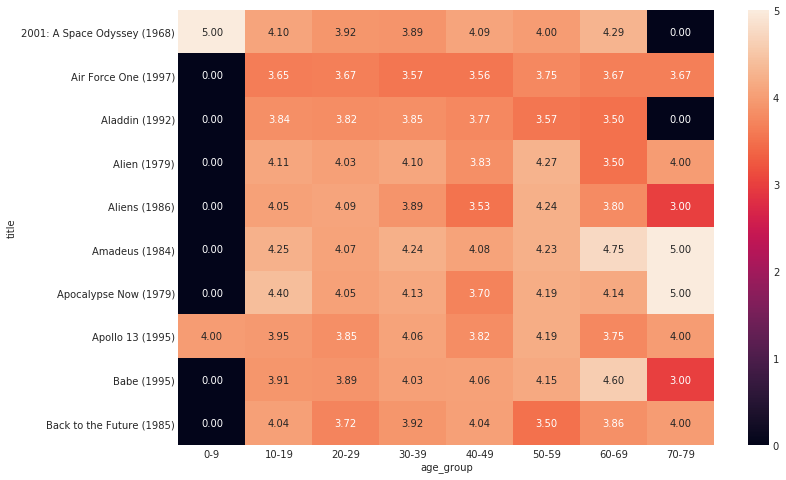

In [52]:
with sns.axes_style('white'):
    plt.figure(figsize=(12, 8))
    sns.heatmap(by_age.rating.mean().unstack(1).fillna(0)[:10], annot=True, fmt='4.2f')

## 评分与性别有关吗？

In [56]:
lens.reset_index('movie_id', inplace=True)

KeyError: 'Level movie_id must be same as name (None)'

In [57]:
lens

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,60,M,retired,95076,60-69
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,60,M,retired,95076,60-69
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,689,"Jackal, The (1997)",01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Jackal%2C+The...,729,4,893286638,19,M,student,56567,10-19
99994,690,Seven Years in Tibet (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Seven+Years+i...,729,2,893286149,19,M,student,56567,10-19


In [54]:
pivoted = lens.pivot_table(index=['movie_id', 'title'], columns=['sex'], values='rating', fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [55]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [58]:
pivoted.reset_index('movie_id', inplace=True)

In [59]:
pivoted.head()

sex,movie_id,F,M,diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
GoldenEye (1995),2,3.368421,3.178571,-0.189850
Four Rooms (1995),3,2.687500,3.108108,0.420608
Get Shorty (1995),4,3.400000,3.591463,0.191463
Copycat (1995),5,3.772727,3.140625,-0.632102


Text(0.5,0,'Average Rating Difference')

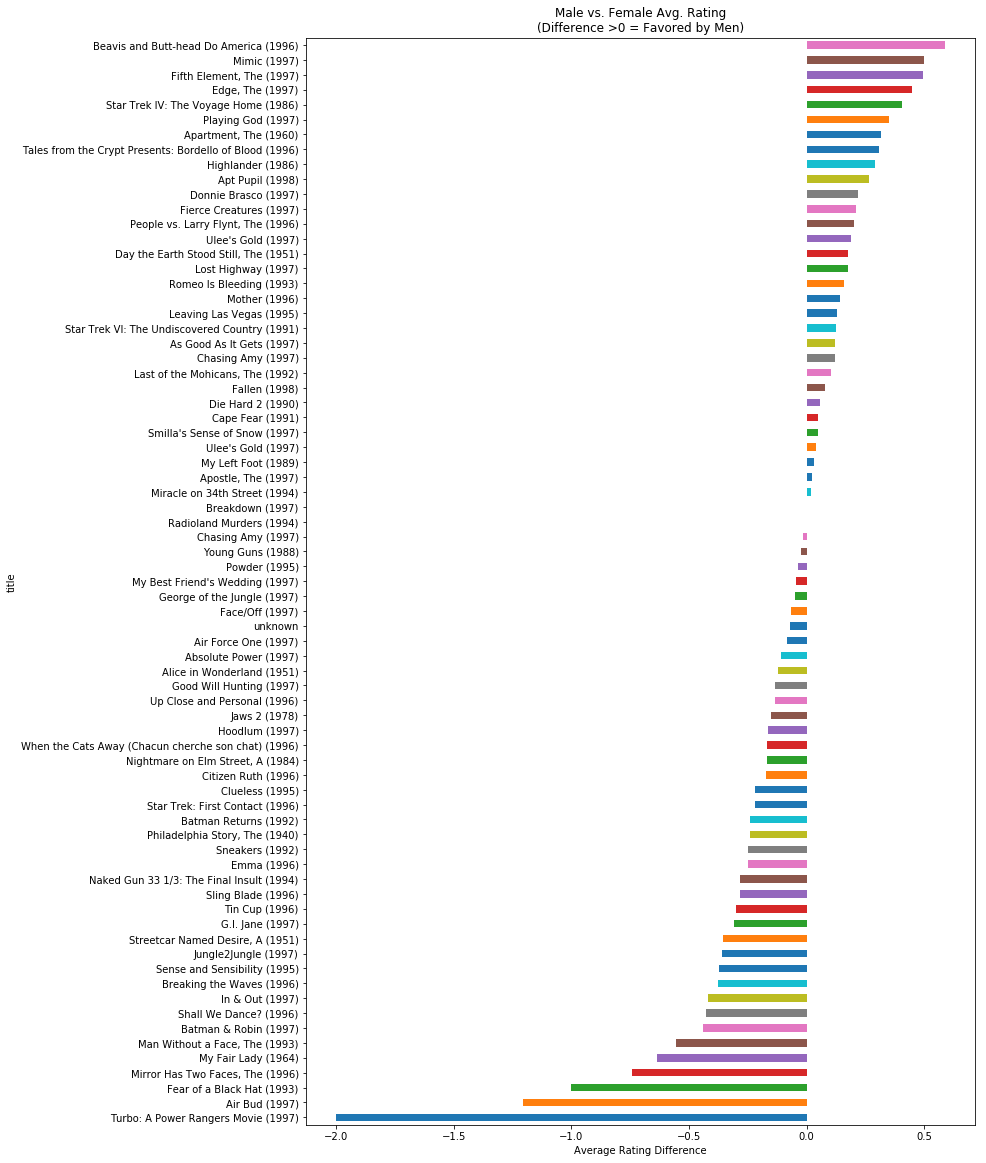

In [60]:
disagreements = pivoted[pivoted.movie_id.isin(most_100)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[12, 20])
plt.title('Male vs. Female Avg. Rating\n(Difference >0 = Favored by Men)')
plt.ylabel('title')
plt.xlabel('Average Rating Difference')

In [61]:
disagreements.head()

title
Cape Fear (1991)                     0.050000
Nightmare on Elm Street, A (1984)   -0.167984
Mirror Has Two Faces, The (1996)    -0.740741
Breaking the Waves (1996)           -0.377358
Star Trek: First Contact (1996)     -0.219178
Name: diff, dtype: float64